# Introduction to Matplotlib

1. Concepts in Matplotlib
2. 2 ways of creating plots (pyplot & OO) - use the OO method
3. Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
4. Plotting data directly with Pandas (using the pandas matplotlib wrapper)
5. Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
6. Cutomizing our plots, limits, colors, styles, legends
7. Saving plots

## 1. Concepts in Matplotlib
- What is Matplotlib?

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

## 2. 2 ways of creating plots
- `pyplot()`
- `Object oriented` (recommended)

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

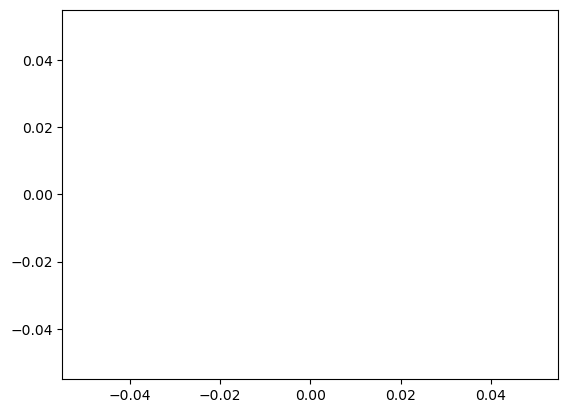

In [2]:
plt.plot()

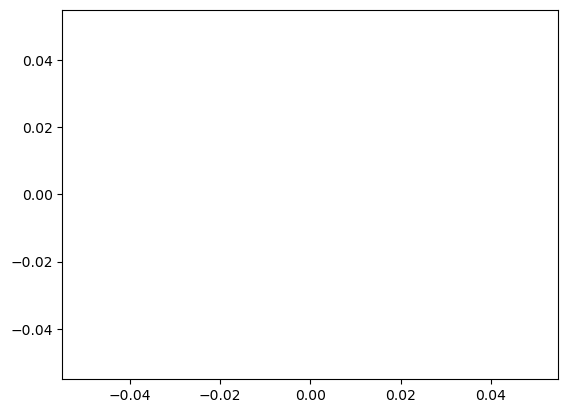

In [3]:
# With the semi-colon
plt.plot();

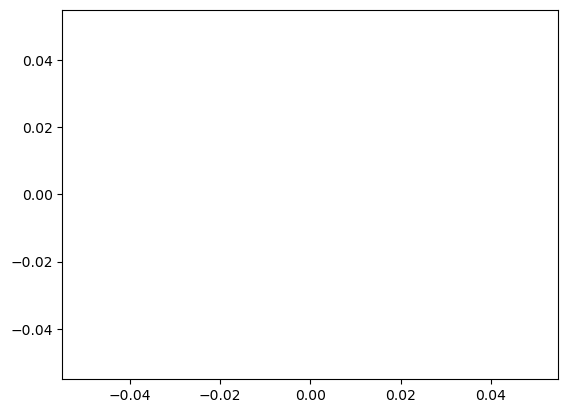

In [4]:
plt.plot()
plt.show();

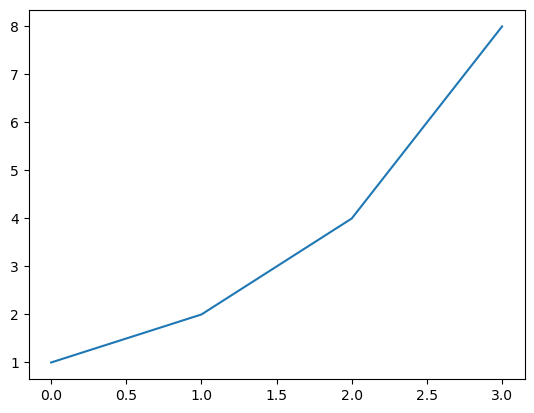

In [5]:
plt.plot([1, 2, 4, 8])

In [6]:
# Create some data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

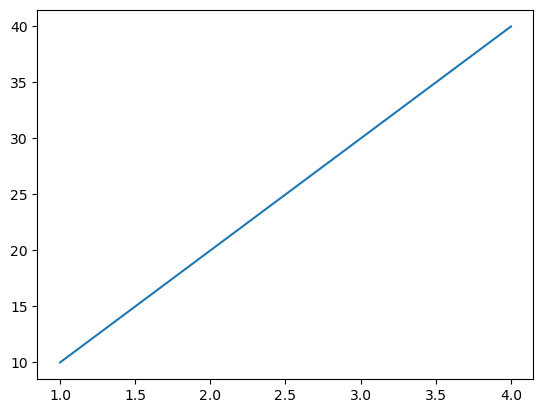

In [7]:
plt.plot(x,y);

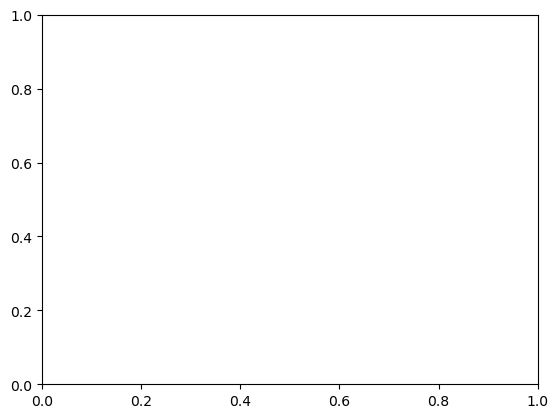

In [8]:
# Creating a plot with OO version
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

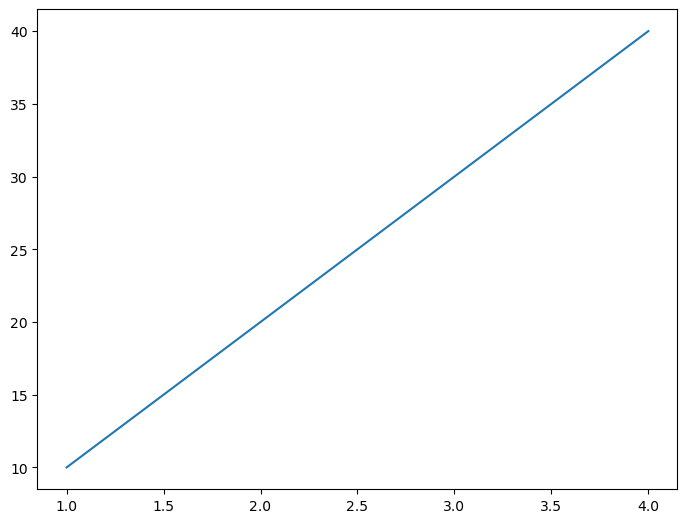

In [9]:
# one more way of OO
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show();

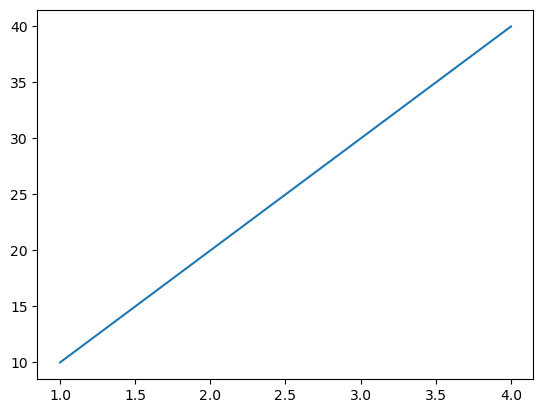

In [10]:
# Easier and more robust going forward
fig, ax = plt.subplots()
ax.plot(x,y);

In [11]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

### A matplotlib workflow

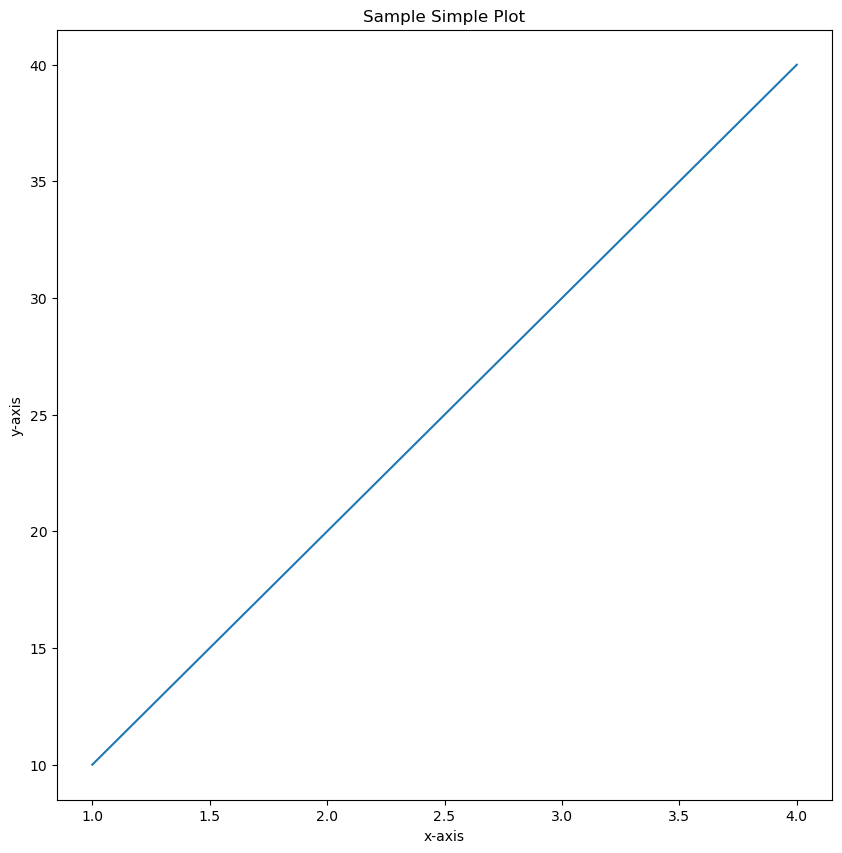

In [12]:
# 1. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 2. Prepare data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# 3. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 4. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. save & show
fig.savefig("../images/simple-plot.png")

## 3. Making the most common type of plots using NumPy arrays

Matplotlib visualizations are built off NumPy arrays. So we will try some of the most common types of plots using NumPy arrays

- `line`
- `scatter`
- `bar`
- `hist`
- `subplots()`

In [13]:
import numpy as np

### Line
Line is a default type of visualization in Matplotlib.

In [14]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

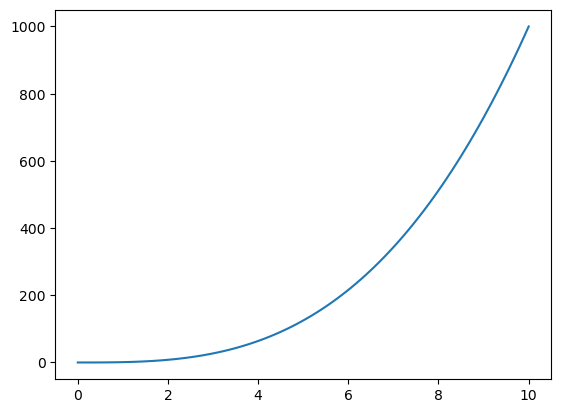

In [15]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**3);

### Scatter


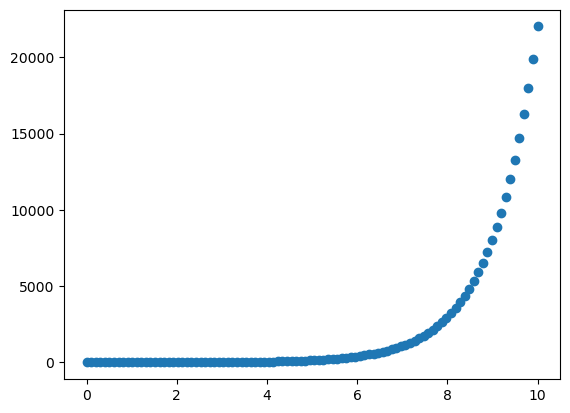

In [16]:
# Need to rereate out figure and axis instance when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

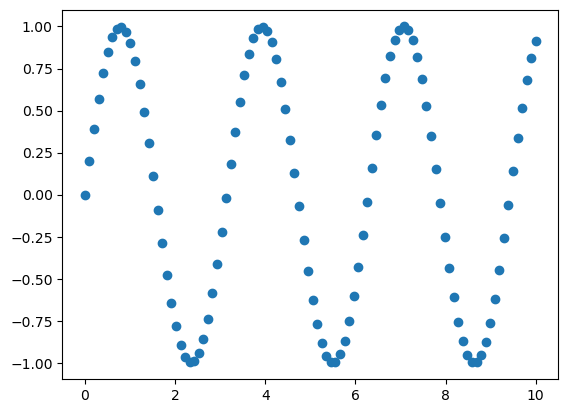

In [17]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x*2));

### Bar
- `Vertical`
- `Horizontal`

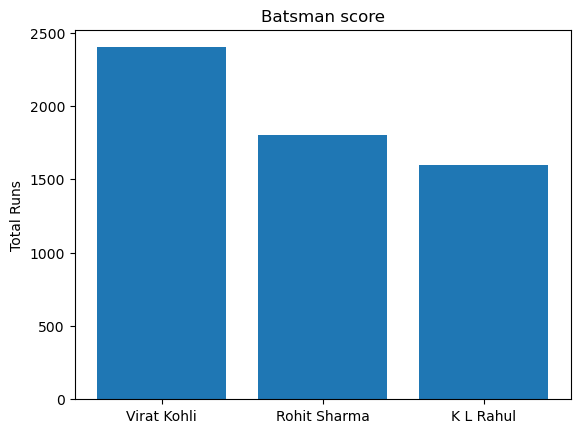

In [18]:
# we can also produce plots from a dictionary
batsman_score = {
    "Virat Kohli": 2400,
    "Rohit Sharma": 1800,
    "K L Rahul": 1600
}
fig, ax = plt.subplots()
ax.bar(batsman_score.keys(), batsman_score.values())
ax.set(title="Batsman score", ylabel="Total Runs");

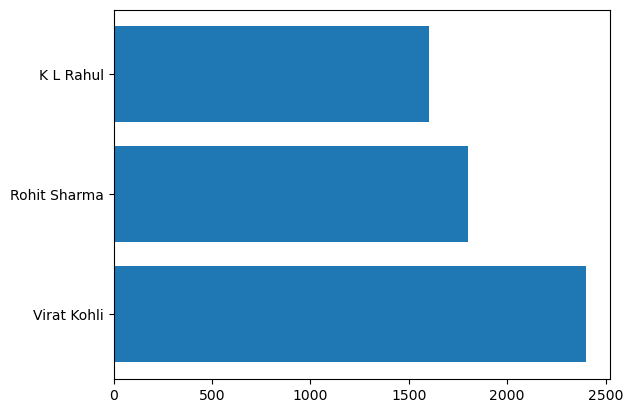

In [19]:
fig, ax = plt.subplots()
ax.barh(list(batsman_score.keys()), list(batsman_score.values()));

### Histogram (hist)
could show image of normal distribution here

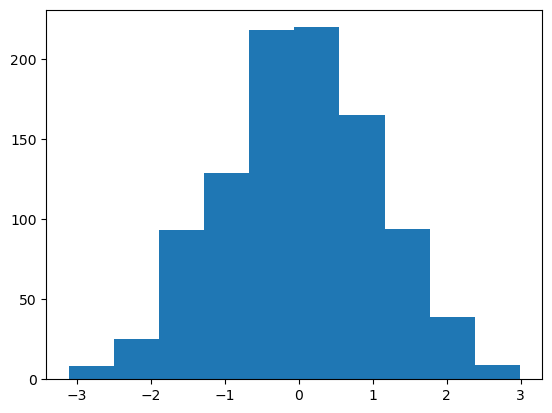

In [20]:
# Pull data from a normal distribution
x = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(x);

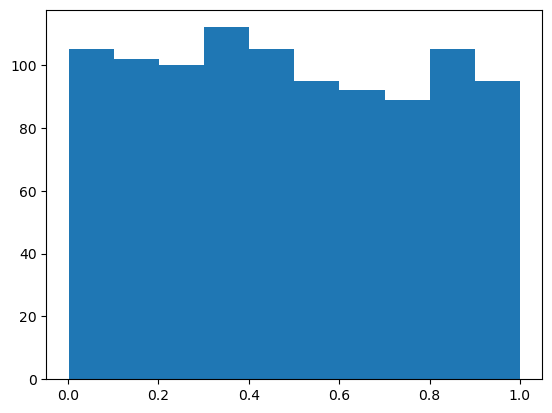

In [21]:
# random data from random distribution
x = np.random.random(1000)

fig, ax = plt.subplots()
ax.hist(x);

### Subplots
- Multiple plots on one figure

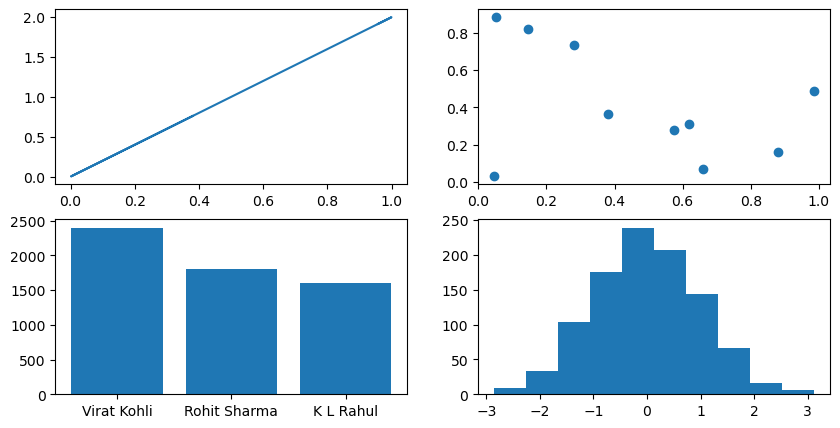

In [22]:
# Option 1 : Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot data to each axes
ax1.plot(x, x*2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(batsman_score.keys(), batsman_score.values());
ax4.hist(np.random.randn(1000));

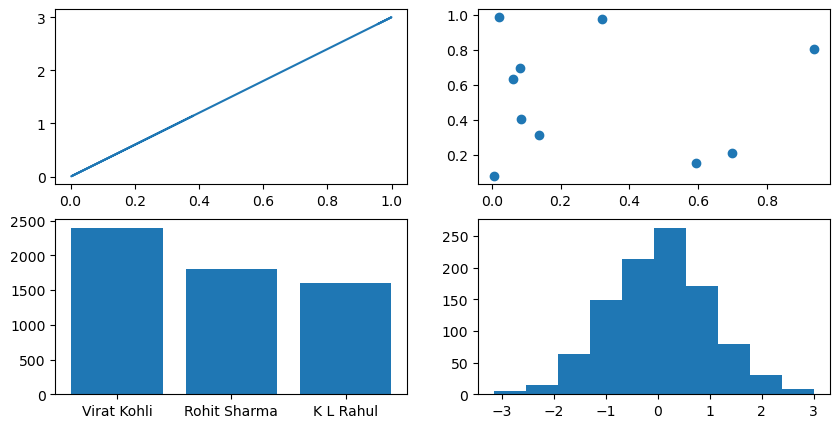

In [23]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x*3);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(batsman_score.keys(), batsman_score.values());
ax[1, 1].hist(np.random.randn(1000));

## 4. Plotting data directly with pandas

Here we will use `pd.plot()` method on DataFrame to plot.

In [24]:
import pandas as pd

In [25]:
# Import the car_sales dataset
car_sales = pd.read_csv("../data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line

In [26]:
# Some dummy data
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2022', periods=1000))
ts

2022-01-01    0.380022
2022-01-02   -0.254625
2022-01-03    1.226317
2022-01-04    0.511762
2022-01-05   -0.436083
                ...   
2024-09-22   -0.275901
2024-09-23    0.076620
2024-09-24    2.283493
2024-09-25    0.122467
2024-09-26    0.066029
Freq: D, Length: 1000, dtype: float64

In [27]:
ts.cumsum()

2022-01-01    0.380022
2022-01-02    0.125396
2022-01-03    1.351713
2022-01-04    1.863475
2022-01-05    1.427393
                ...   
2024-09-22    1.314931
2024-09-23    1.391551
2024-09-24    3.675043
2024-09-25    3.797510
2024-09-26    3.863538
Freq: D, Length: 1000, dtype: float64

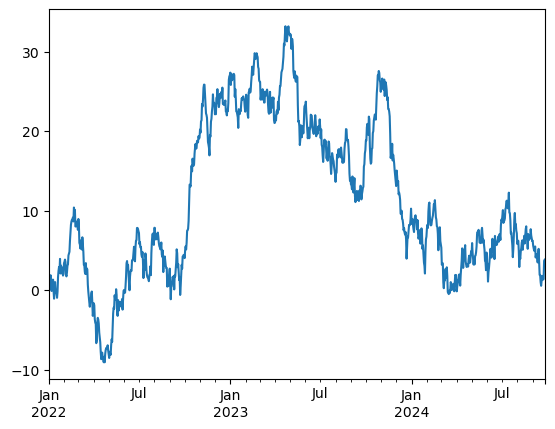

In [28]:
ts.cumsum().plot();

<Axes: >

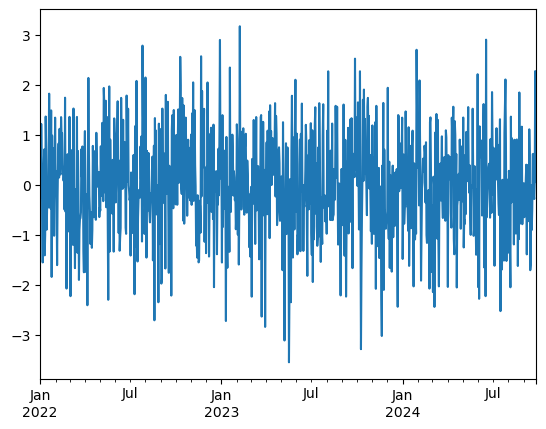

In [29]:
ts.plot()

### Working with actual data

In [30]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\kunal\AppData\Local\Temp\ipykernel_14528\54845402.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [31]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [32]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


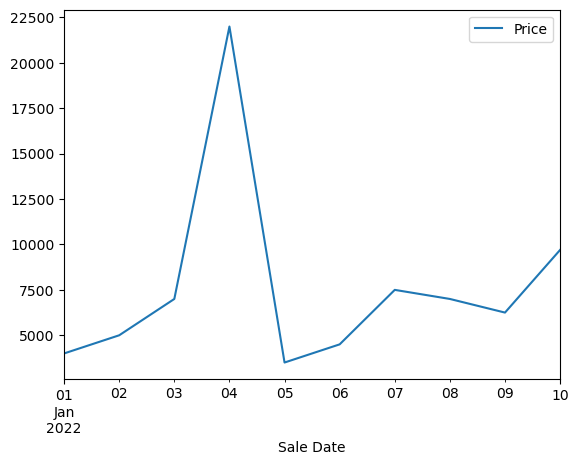

In [33]:
car_sales.plot(x='Sale Date', y='Price');

In [34]:
# Make total sales column
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


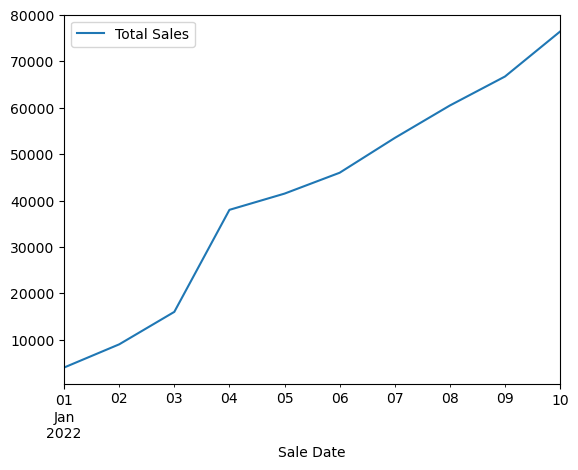

In [35]:
car_sales.plot(x='Sale Date', y='Total Sales');

### Scatter

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

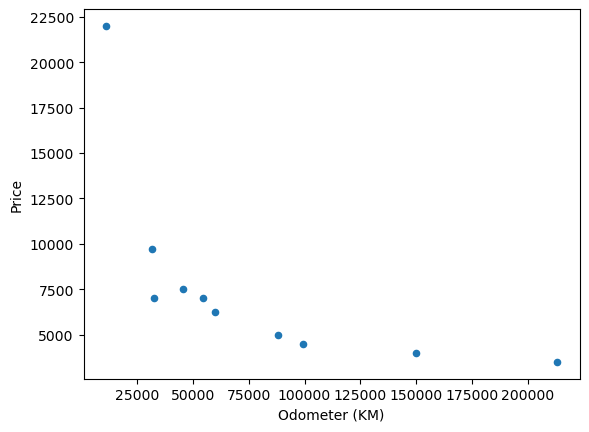

In [36]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

### Bar

In [37]:
x = np.random.rand(10,4)
x

array([[0.92137342, 0.82037521, 0.43774886, 0.5516177 ],
       [0.7901302 , 0.28550604, 0.38921317, 0.89581135],
       [0.6610688 , 0.147037  , 0.84828017, 0.82723455],
       [0.12988109, 0.58981749, 0.92274038, 0.51065056],
       [0.74251838, 0.75283368, 0.25616535, 0.54862324],
       [0.27509429, 0.87538289, 0.78489844, 0.72887227],
       [0.97155309, 0.95933215, 0.8763647 , 0.98233769],
       [0.67164373, 0.37142637, 0.27800205, 0.96516433],
       [0.74937052, 0.37535018, 0.82427757, 0.38779588],
       [0.61983611, 0.80236435, 0.01107413, 0.26727279]])

In [38]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.921373,0.820375,0.437749,0.551618
1,0.790130,0.285506,0.389213,0.895811
2,0.661069,0.147037,0.848280,0.827235
3,0.129881,0.589817,0.922740,0.510651
4,0.742518,0.752834,0.256165,0.548623
5,0.275094,0.875383,0.784898,0.728872
6,0.971553,0.959332,0.876365,0.982338
7,0.671644,0.371426,0.278002,0.965164
8,0.749371,0.375350,0.824278,0.387796
9,0.619836,0.802364,0.011074,0.267273


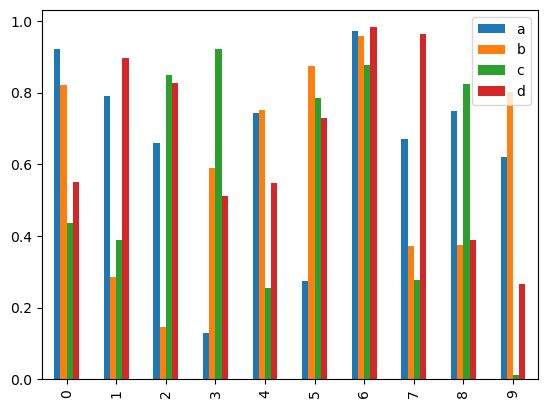

In [39]:
df.plot.bar();

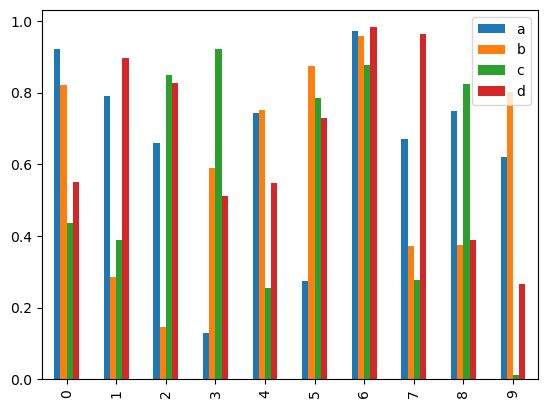

In [40]:
# another way of doing
df.plot(kind='bar');

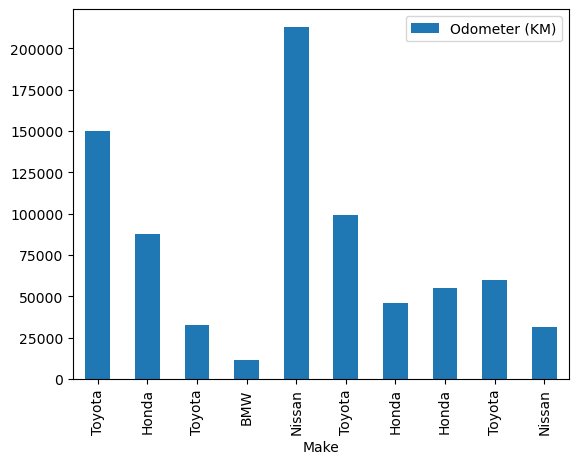

In [41]:
# car_sales.plot(x="Make", y="Odometer (KM)", kind='bar')

car_sales.plot.bar(x="Make", y="Odometer (KM)");

### Histograms

In [42]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


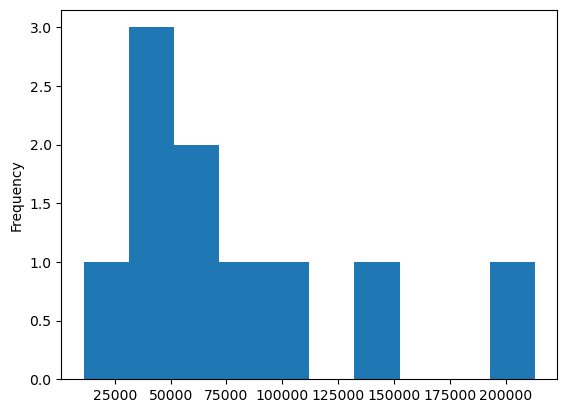

In [43]:
car_sales["Odometer (KM)"].plot.hist();

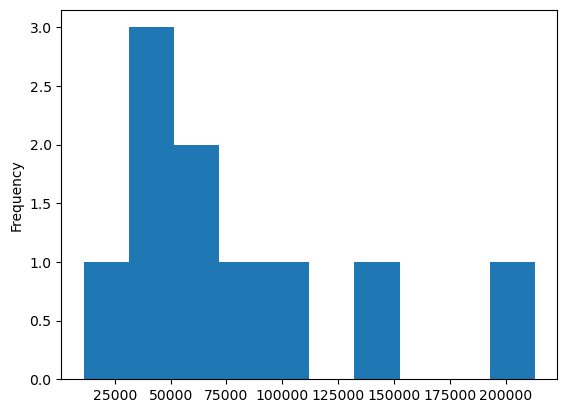

In [44]:
car_sales["Odometer (KM)"].plot(kind="hist");

<Axes: ylabel='Frequency'>

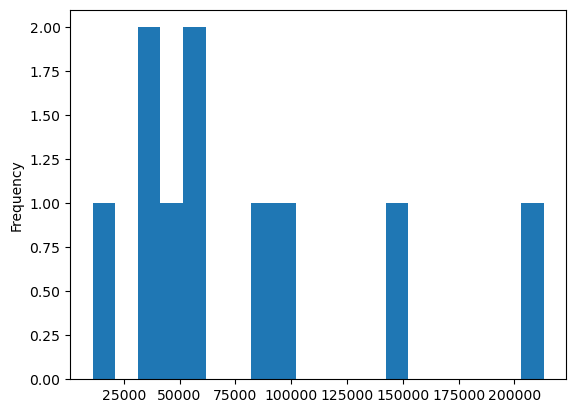

In [45]:
# Default number of bins is 10
car_sales["Odometer (KM)"].plot.hist(bins=20)

In [46]:
# Try on another dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


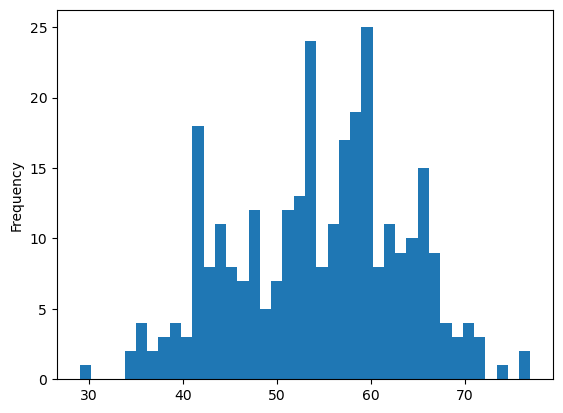

In [47]:
heart_disease["age"].plot.hist(bins=40);

### Subplots

In [48]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


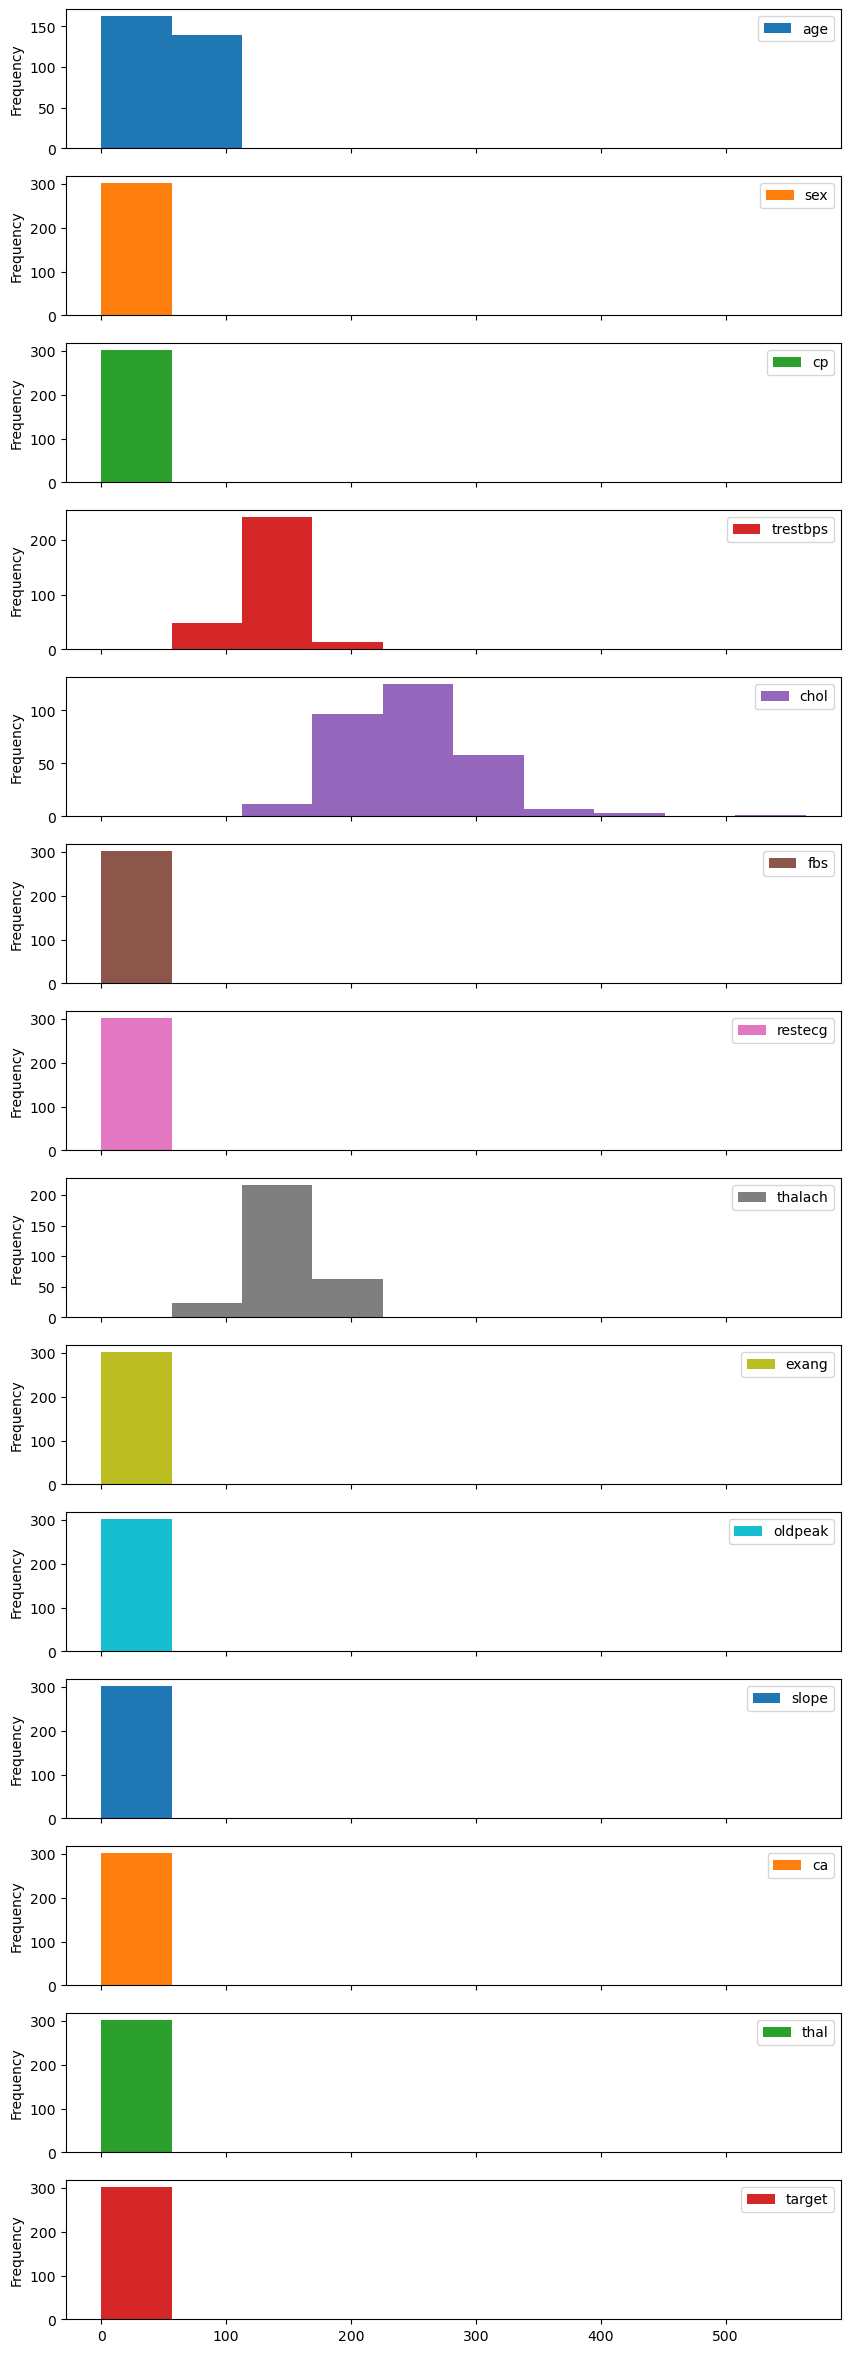

In [49]:
heart_disease.plot.hist(figsize=(10,30), subplots=True);

## 5. Plotting with pandas using OO method

For more complicated plots. use OO method

In [50]:
# Filter out the data on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


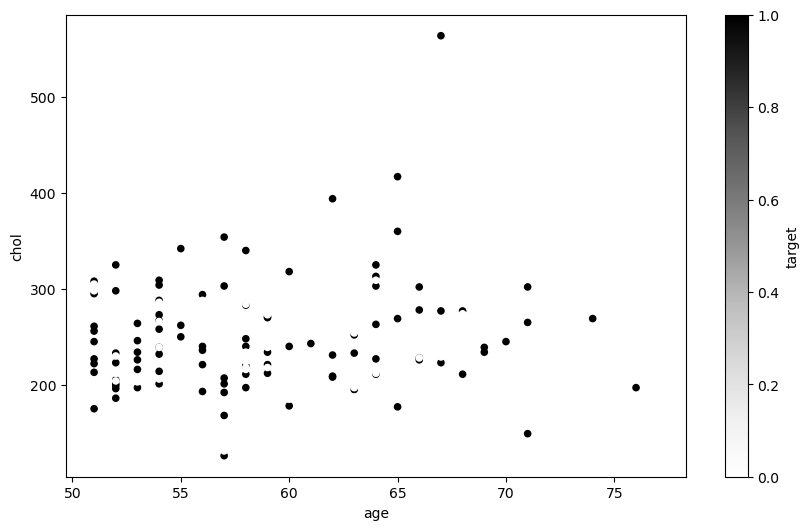

In [54]:
# scatter plot the relation between x and y i.e (x,y)
# and c categorize the target data. here target contains only 0 & 1. 
# i.e why only black and white color are used
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            figsize=(10,6));

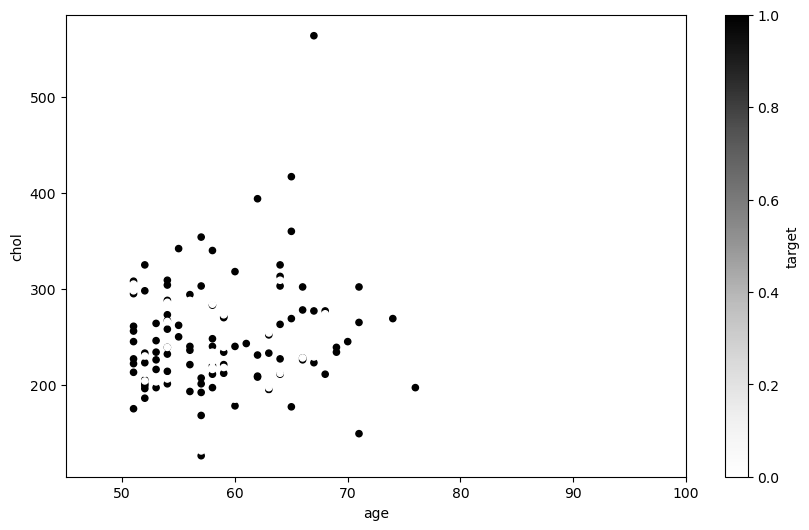

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

# set the limit of x-axis
ax.set_xlim([45, 100]);

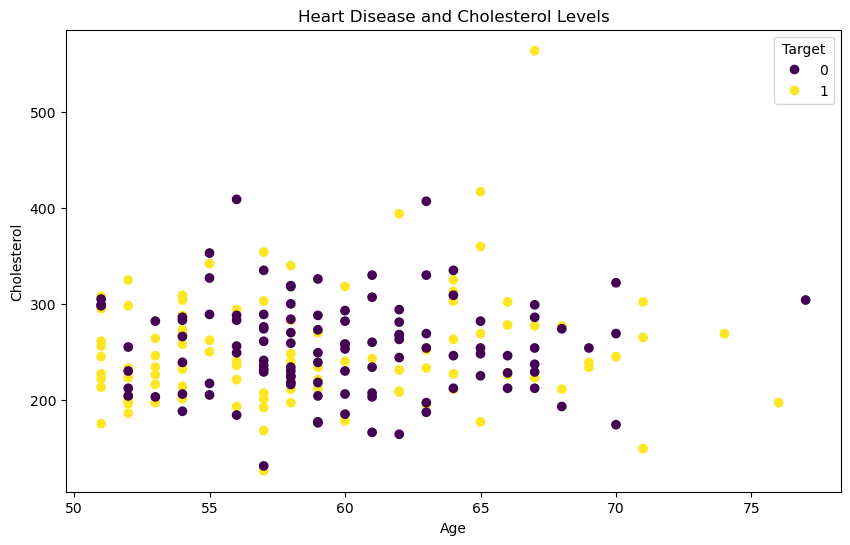

In [64]:
# Using OO method
# Create the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(over_50["age"],
                    over_50["chol"],
                    c=over_50["target"]) # c = color

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")
# * -> unpack all the legends  
ax.legend(*scatter.legend_elements(), title="Target");

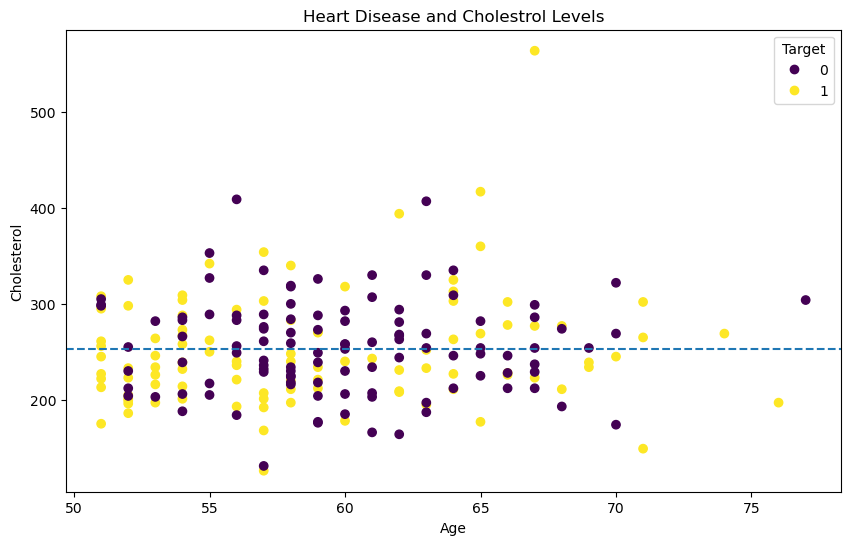

In [79]:
# Lets us add a horizontal line going across with the mean of "chol"

# create a plot
fig, ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
          linestyle="--")

### Adding another plot to existing styled one

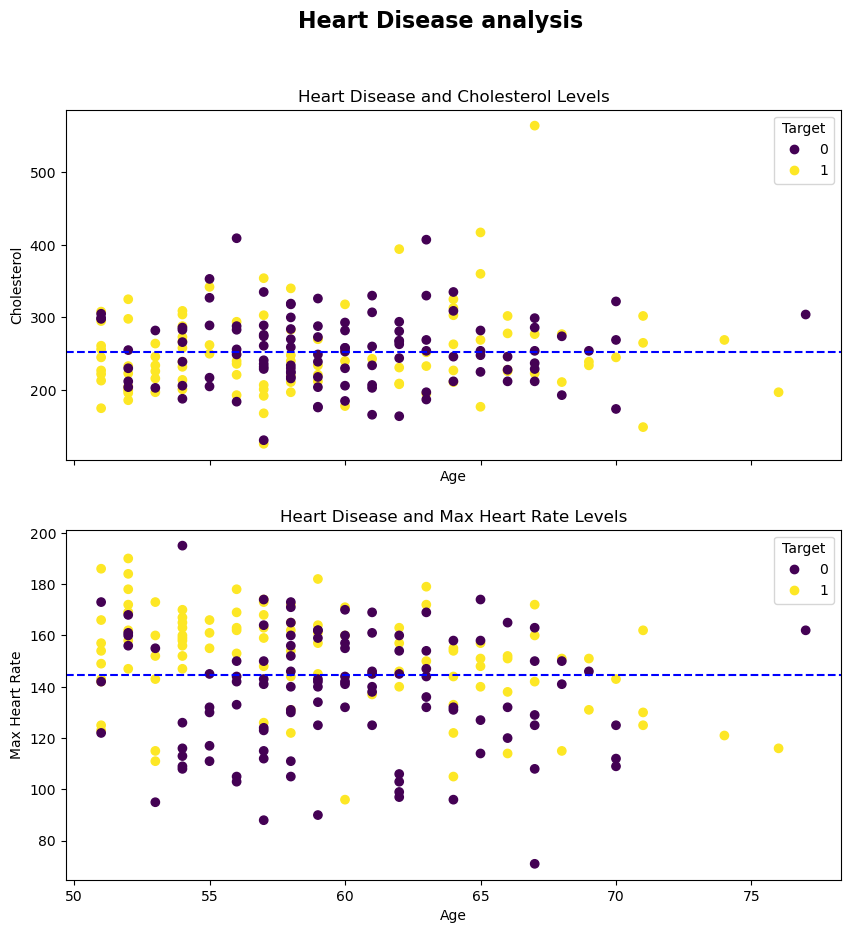

In [95]:
# setup a plot( 2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              sharex=True,
                              figsize=(10,10))

# Add data for ax0
scatter = ax0.scatter(over_50["age"],
                     over_50["chol"],
                     c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(),
           color='b',
           linestyle='--',
           label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease analysis', fontsize=16, fontweight='bold');

## 6. Customize your plots
 - `limits (xlim,ylim)`, `colors`, `styles`, `legends`

### Style

In [98]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

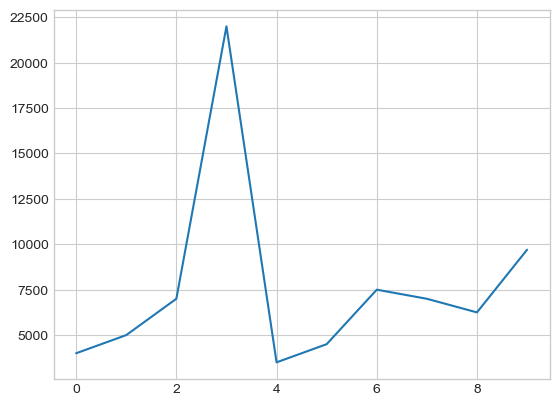

In [103]:
# Plot the graph
car_sales["Price"].plot();

C:\Users\kunal\AppData\Local\Temp\ipykernel_14528\1747034369.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


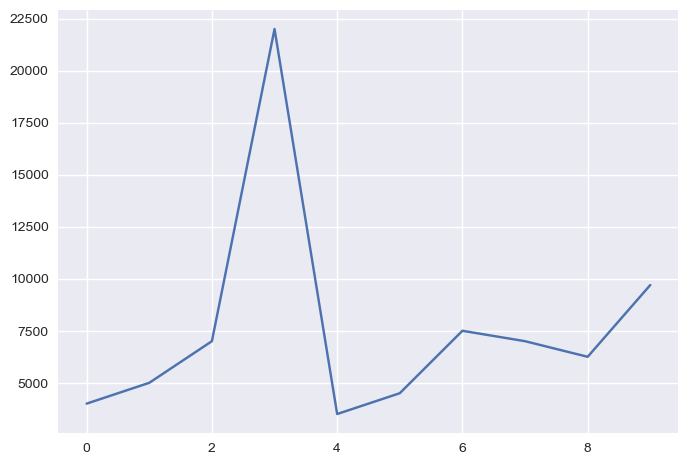

In [106]:
# Changing the style
plt.style.use('seaborn')

car_sales["Price"].plot();

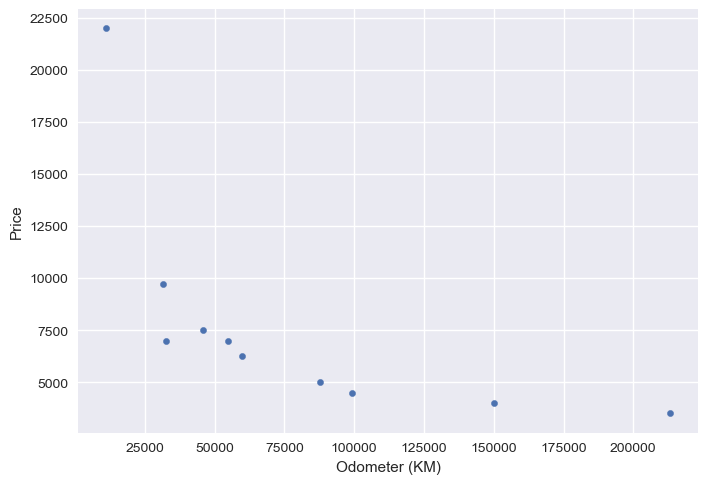

In [107]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [116]:
plt.style.use('ggplot')

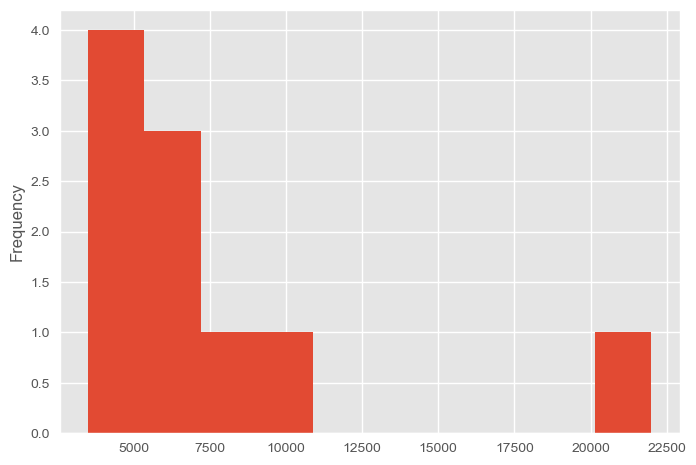

In [117]:
car_sales["Price"].plot.hist();

### Changind the title, legend, axes

In [118]:
x = np.random.randn(10,4)
x

array([[ 1.46326584,  0.0052019 , -0.77794158, -0.47269196],
       [-1.09875029, -1.35184066, -1.0101653 , -0.03797092],
       [ 0.14623611, -1.52034826, -0.84552314, -1.16170021],
       [-0.50395452, -0.24487616, -2.45234714, -0.64801718],
       [ 0.3963653 ,  0.63502481,  0.2529704 ,  2.05430948],
       [-0.24268327,  1.31560726,  0.23690233,  0.80005652],
       [-0.2526783 , -0.81348709,  1.27678129, -0.32597182],
       [ 0.59000524, -0.08679094, -1.85064088,  0.02173571],
       [-0.63098635,  0.13328084, -0.69096294,  0.75710217],
       [ 0.15006875, -0.54305022,  0.38999148,  0.01649868]])

In [119]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.463266,0.005202,-0.777942,-0.472692
1,-1.098750,-1.351841,-1.010165,-0.037971
2,0.146236,-1.520348,-0.845523,-1.161700
3,-0.503955,-0.244876,-2.452347,-0.648017
4,0.396365,0.635025,0.252970,2.054309
5,-0.242683,1.315607,0.236902,0.800057
6,-0.252678,-0.813487,1.276781,-0.325972
7,0.590005,-0.086791,-1.850641,0.021736
8,-0.630986,0.133281,-0.690963,0.757102
9,0.150069,-0.543050,0.389991,0.016499


matplotlib.axes._axes.Axes

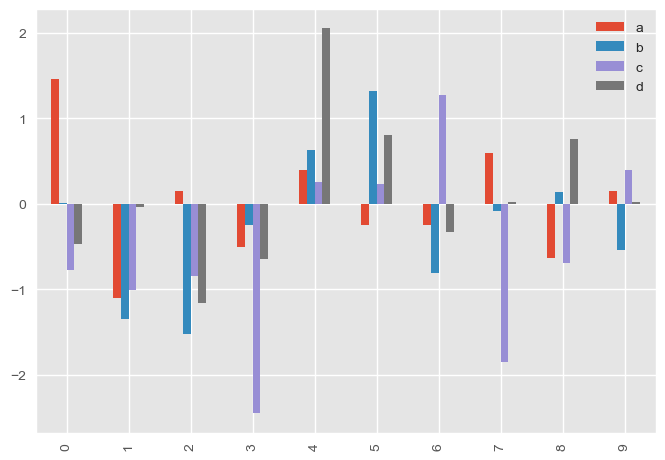

In [122]:
ax = df.plot(kind="bar")
type(ax)

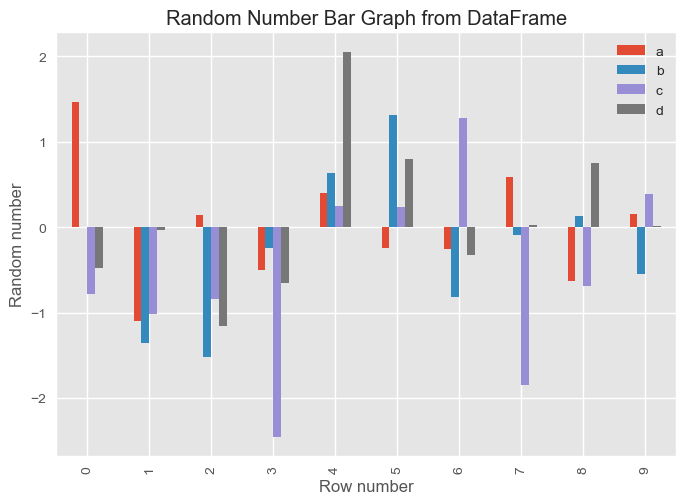

In [126]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)

### Changing the cmap

In [127]:
plt.style.use('seaborn-whitegrid')

C:\Users\kunal\AppData\Local\Temp\ipykernel_14528\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


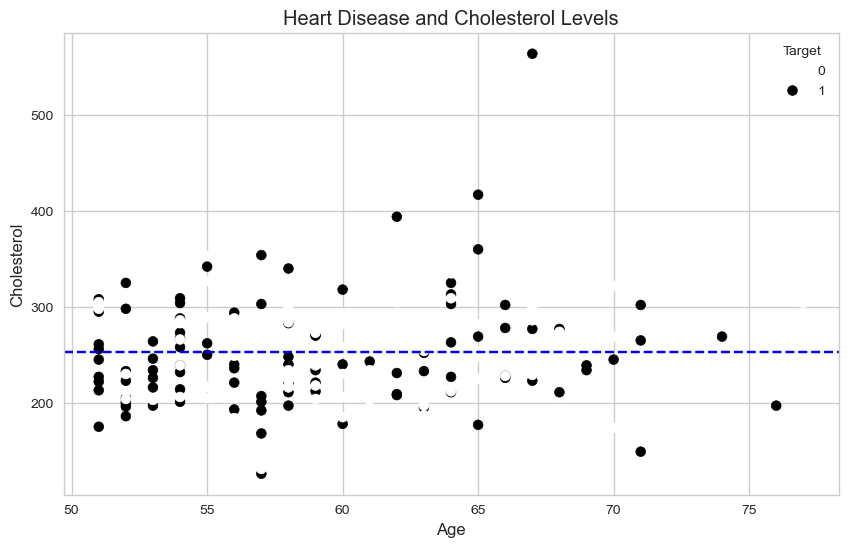

In [128]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

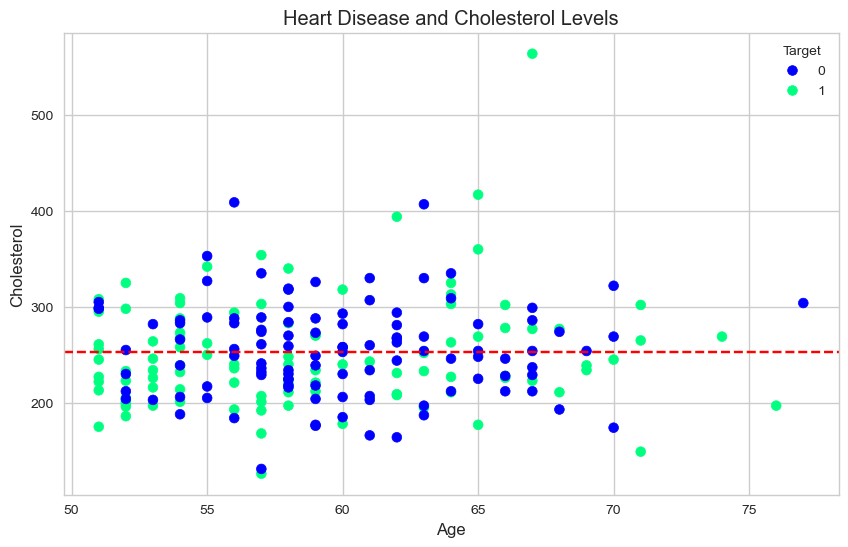

In [129]:
# Change cmap and horizontal line to be a different colour
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

### Changing the xlim & ylim

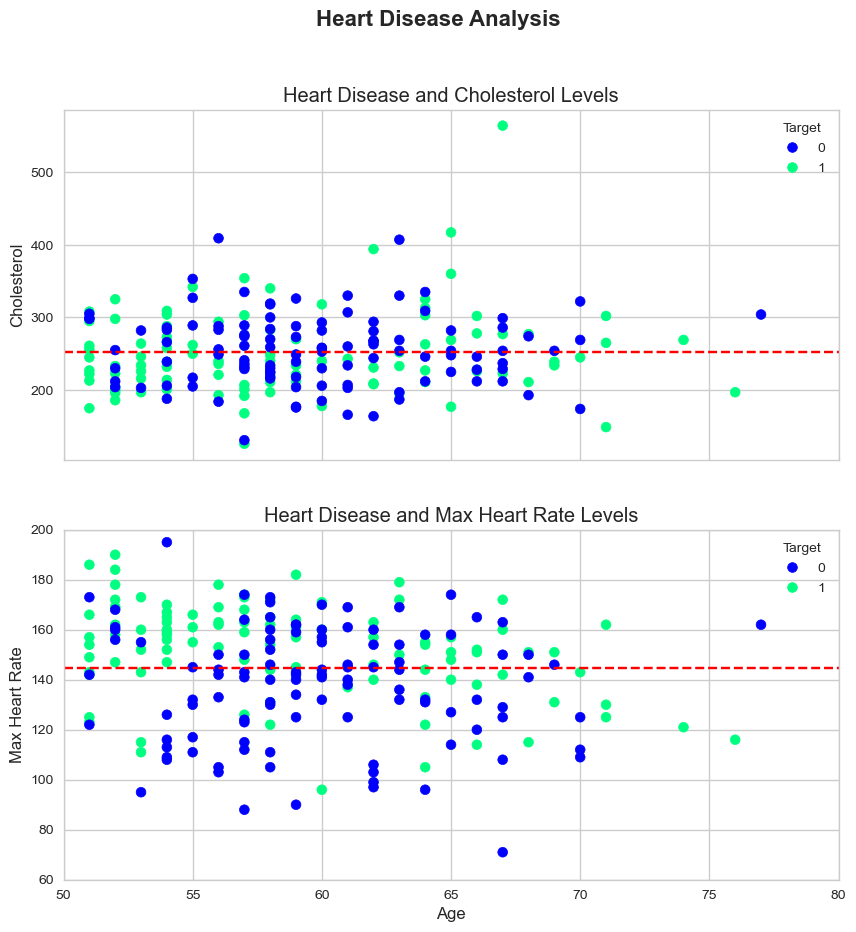

In [130]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 07. Saving plots

- Saving plots to images using `figsave()`

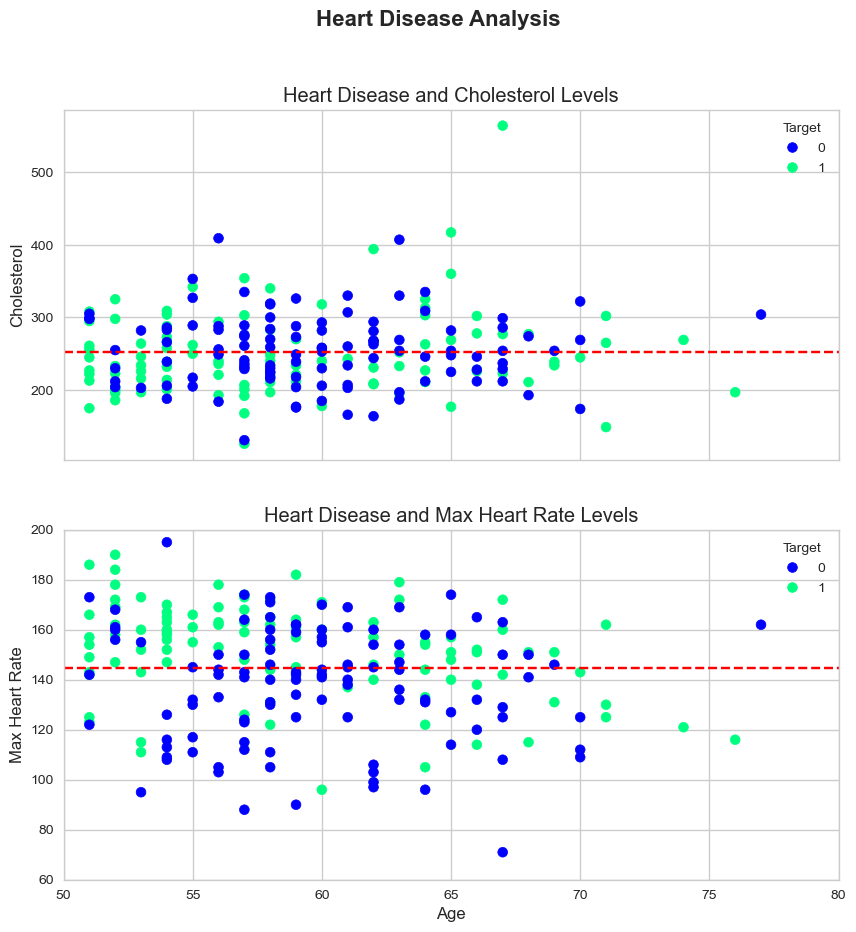

In [134]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [135]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

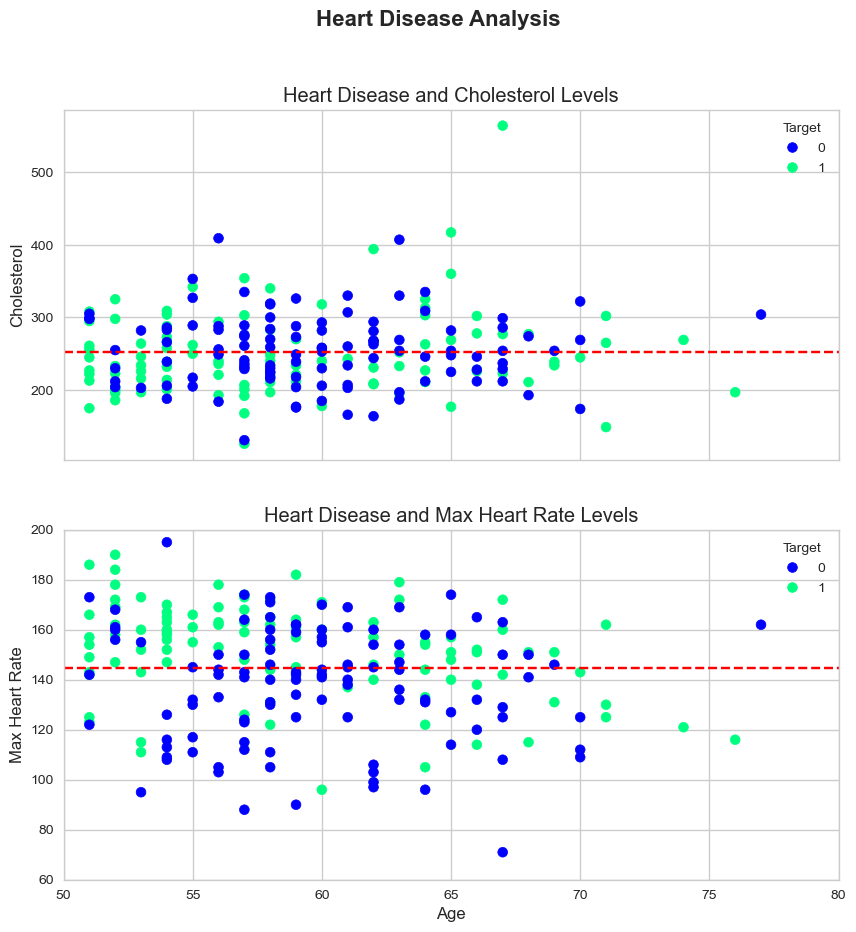

In [136]:
fig

In [137]:
# Save the file
fig.savefig("../images/heart-disease-analysis.png")

In [138]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot